<a href="https://colab.research.google.com/github/peterbabulik/QantumKernelClustering/blob/main/QantumKernelClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [3]:
import cirq
import numpy as np
import tensorflow as tf
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_moons

class QuantumClusterKernel:
    """Quantum Network Kernel optimized for clustering tasks"""

    def __init__(self,
                 n_qubits: int,
                 layer_structure: List[int],
                 connection_type: str = 'dense',
                 activation: str = 'quantum_relu',
                 verbose: bool = True):
        """Initialize Quantum Clustering Kernel"""
        self.n_qubits = n_qubits
        self.layer_structure = layer_structure
        self.connection_type = connection_type
        self.activation = activation
        self.verbose = verbose
        self.qubits = cirq.LineQubit.range(n_qubits)
        self.simulator = cirq.Simulator()

        if self.verbose:
            print(f"Initializing Quantum Cluster Kernel with {n_qubits} qubits")
            print(f"Layer structure: {layer_structure}")
            print(f"Connection type: {connection_type}")
            print(f"Activation: {activation}")

        self.weights = self._initialize_weights()
        self.network = self._create_network()

    def _initialize_weights(self) -> Dict[str, np.ndarray]:
        """Initialize network weights with explanation"""
        weights = {}
        prev_size = self.n_qubits

        if self.verbose:
            print("\nInitializing quantum network weights:")

        for i, layer_size in enumerate(self.layer_structure):
            if self.verbose:
                print(f"Layer {i}: Input size {prev_size} → Output size {layer_size}")

            scale = 1.0 / np.sqrt(prev_size)
            weights[f'layer_{i}'] = np.random.uniform(-scale, scale, size=(prev_size, layer_size)) * np.pi
            weights[f'bias_{i}'] = np.random.uniform(-scale, scale, size=layer_size) * np.pi
            prev_size = layer_size

        return weights

    def quantum_clustering(self,
                         data: np.ndarray,
                         n_clusters: int = 2,
                         max_iter: int = 100,
                         tolerance: float = 1e-4) -> Tuple[np.ndarray, Dict]:
        """
        Perform quantum kernel-based clustering with detailed progress information

        Args:
            data: Input data to cluster
            n_clusters: Number of clusters to form
            max_iter: Maximum iterations for convergence
            tolerance: Convergence tolerance

        Returns:
            clusters: Cluster assignments
            info: Dictionary containing clustering information
        """
        if self.verbose:
            print("\n=== Starting Quantum Clustering Process ===")
            print(f"Number of samples: {len(data)}")
            print(f"Number of clusters: {n_clusters}")
            print("Computing initial kernel matrix...")

        # Compute kernel matrix
        kernel_matrix = self.compute_kernel_matrix(data)
        n_samples = len(data)

        # Initialize cluster centers randomly
        clusters = np.random.randint(0, n_clusters, size=n_samples)
        old_clusters = np.zeros_like(clusters)

        info = {
            'iterations': 0,
            'convergence_history': [],
            'cluster_sizes_history': [],
            'kernel_statistics': {
                'mean': np.mean(kernel_matrix),
                'std': np.std(kernel_matrix),
                'min': np.min(kernel_matrix),
                'max': np.max(kernel_matrix)
            }
        }

        if self.verbose:
            print("\nStarting clustering iterations:")

        # Clustering iterations
        for iteration in range(max_iter):
            if self.verbose:
                print(f"\nIteration {iteration + 1}/{max_iter}")

            # Store old assignments
            old_clusters = clusters.copy()

            # Update cluster assignments
            for i in range(n_samples):
                distances = np.zeros(n_clusters)
                for k in range(n_clusters):
                    cluster_points = clusters == k
                    if np.sum(cluster_points) > 0:
                        # Compute distance in feature space using kernel trick
                        distances[k] = kernel_matrix[i, i] - \
                                     2 * np.mean(kernel_matrix[i, cluster_points]) + \
                                     np.mean(kernel_matrix[np.ix_(cluster_points, cluster_points)])

                clusters[i] = np.argmin(distances)

            # Calculate changes
            changes = np.sum(clusters != old_clusters)
            change_ratio = changes / n_samples

            # Update info
            info['convergence_history'].append(change_ratio)
            info['cluster_sizes_history'].append(np.bincount(clusters, minlength=n_clusters))

            if self.verbose:
                print(f"Changes in cluster assignments: {changes} samples ({change_ratio:.2%})")
                print("Cluster sizes:", np.bincount(clusters, minlength=n_clusters))

            # Check convergence
            if change_ratio < tolerance:
                if self.verbose:
                    print(f"\nConverged after {iteration + 1} iterations!")
                break

        info['iterations'] = iteration + 1
        info['final_cluster_sizes'] = np.bincount(clusters, minlength=n_clusters)

        if self.verbose:
            print("\n=== Clustering Complete ===")
            print(f"Final cluster sizes: {info['final_cluster_sizes']}")
            print(f"Total iterations: {info['iterations']}")

        return clusters, info

    def visualize_clustering_results(self,
                                   data: np.ndarray,
                                   clusters: np.ndarray,
                                   info: Dict):
        """Visualize clustering results with multiple plots"""
        if data.shape[1] != 2:
            print("Visualization requires 2D data")
            return

        fig = plt.figure(figsize=(15, 5))

        # Plot 1: Scatter plot of clusters
        ax1 = fig.add_subplot(131)
        scatter = ax1.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
        ax1.set_title('Clustering Results')
        plt.colorbar(scatter, ax=ax1)

        # Plot 2: Convergence history
        ax2 = fig.add_subplot(132)
        ax2.plot(info['convergence_history'], '-o')
        ax2.set_title('Convergence History')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Change Ratio')

        # Plot 3: Cluster sizes history
        ax3 = fig.add_subplot(133)
        cluster_sizes = np.array(info['cluster_sizes_history'])
        for i in range(cluster_sizes.shape[1]):
            ax3.plot(cluster_sizes[:, i], '-o', label=f'Cluster {i}')
        ax3.set_title('Cluster Sizes Evolution')
        ax3.set_xlabel('Iteration')
        ax3.set_ylabel('Cluster Size')
        ax3.legend()

        plt.tight_layout()
        plt.show()

# Example usage
def run_clustering_example():
    print("=== Quantum Clustering Demonstration ===")

    # Generate sample data
    n_samples = 100
    X, _ = make_moons(n_samples=n_samples, noise=0.15)

    # Scale data to [-π, π]
    scaler = MinMaxScaler(feature_range=(-np.pi, np.pi))
    X_scaled = scaler.fit_transform(X)

    # Initialize quantum kernel
    qk = QuantumClusterKernel(
        n_qubits=2,  # 2D data
        layer_structure=[2, 2],
        connection_type='dense',
        activation='quantum_relu',
        verbose=True
    )

    # Perform clustering
    print("\nPerforming quantum clustering...")
    clusters, info = qk.quantum_clustering(X_scaled, n_clusters=2)

    # Visualize results
    print("\nVisualizing results...")
    qk.visualize_clustering_results(X_scaled, clusters, info)

    return qk, clusters, info

if __name__ == "__main__":
    qk, clusters, info = run_clustering_example()

=== Quantum Clustering Demonstration ===
Initializing Quantum Cluster Kernel with 2 qubits
Layer structure: [2, 2]
Connection type: dense
Activation: quantum_relu

Initializing quantum network weights:
Layer 0: Input size 2 → Output size 2
Layer 1: Input size 2 → Output size 2


AttributeError: 'QuantumClusterKernel' object has no attribute '_create_network'

=== Quantum Clustering Demonstration ===
Initializing Quantum Cluster Kernel with 2 qubits
Layer structure: [2, 2]
Connection type: dense
Activation: quantum_relu

Initializing quantum network weights:
Layer 0: Input size 2 → Output size 2
Layer 1: Input size 2 → Output size 2

Creating quantum network structure...
Created network with 6 nodes and 8 connections

Performing quantum clustering...

=== Starting Quantum Clustering Process ===
Number of samples: 100
Number of clusters: 2
Computing initial kernel matrix...

Computing kernel matrix...


100%|██████████| 100/100 [00:40<00:00,  2.47it/s]



Starting clustering iterations:

Iteration 1/100
Changes in cluster assignments: 38 samples (38.00%)
Cluster sizes: [43 57]

Iteration 2/100
Changes in cluster assignments: 2 samples (2.00%)
Cluster sizes: [41 59]

Iteration 3/100
Changes in cluster assignments: 2 samples (2.00%)
Cluster sizes: [39 61]

Iteration 4/100
Changes in cluster assignments: 0 samples (0.00%)
Cluster sizes: [39 61]

Converged after 4 iterations!

=== Clustering Complete ===
Final cluster sizes: [39 61]
Total iterations: 4

Visualizing results...


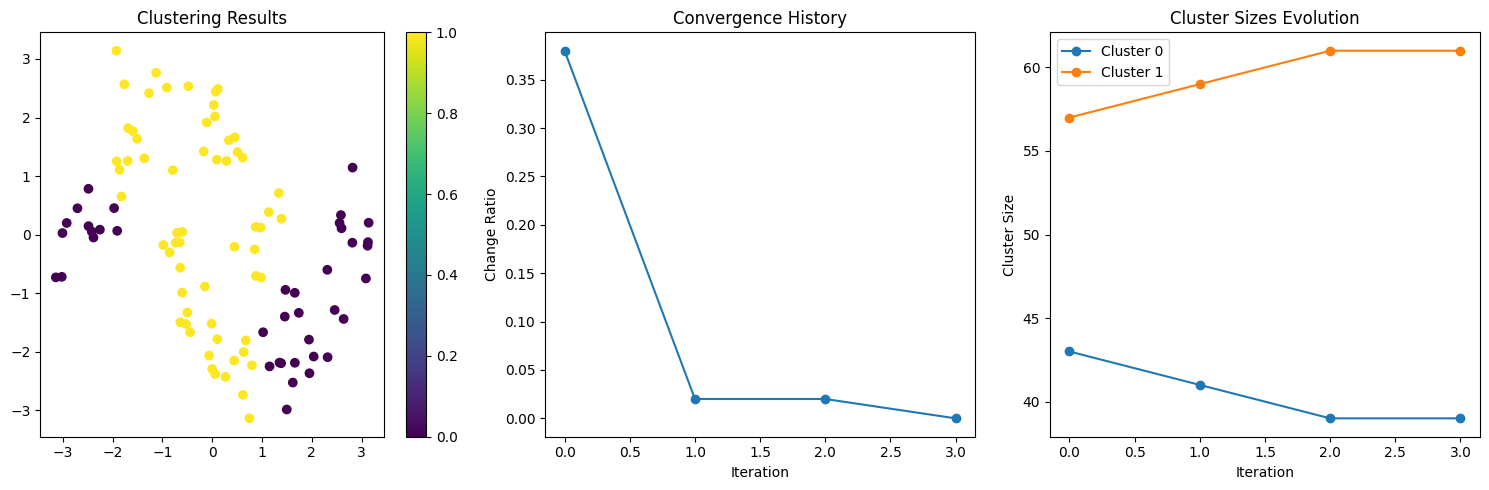

In [4]:
import cirq
import numpy as np
import tensorflow as tf
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_moons

class QuantumClusterKernel:
    """Quantum Network Kernel optimized for clustering tasks"""

    def __init__(self,
                 n_qubits: int,
                 layer_structure: List[int],
                 connection_type: str = 'dense',
                 activation: str = 'quantum_relu',
                 verbose: bool = True):
        """Initialize Quantum Clustering Kernel"""
        self.n_qubits = n_qubits
        self.layer_structure = layer_structure
        self.connection_type = connection_type
        self.activation = activation
        self.verbose = verbose
        self.qubits = cirq.LineQubit.range(n_qubits)
        self.simulator = cirq.Simulator()

        if self.verbose:
            print(f"Initializing Quantum Cluster Kernel with {n_qubits} qubits")
            print(f"Layer structure: {layer_structure}")
            print(f"Connection type: {connection_type}")
            print(f"Activation: {activation}")

        self.weights = self._initialize_weights()
        self.network = self._create_network()

    def _create_network(self) -> nx.DiGraph:
        """Create network structure with quantum layers"""
        if self.verbose:
            print("\nCreating quantum network structure...")

        G = nx.DiGraph()
        current_idx = 0
        layer_indices = []

        # Input layer
        input_indices = list(range(self.n_qubits))
        layer_indices.append(input_indices)
        for idx in input_indices:
            G.add_node(idx, layer=0, type='input')
        current_idx = self.n_qubits

        # Hidden layers
        for layer_num, size in enumerate(self.layer_structure, 1):
            layer_nodes = list(range(current_idx, current_idx + size))
            layer_indices.append(layer_nodes)

            for idx in layer_nodes:
                G.add_node(idx, layer=layer_num, type='hidden')

            current_idx += size

        # Add connections based on type
        if self.connection_type == 'dense':
            for i in range(len(layer_indices) - 1):
                for src in layer_indices[i]:
                    for dst in layer_indices[i + 1]:
                        G.add_edge(src, dst)
        elif self.connection_type == 'residual':
            for i in range(len(layer_indices) - 1):
                # Regular connections
                for src in layer_indices[i]:
                    for dst in layer_indices[i + 1]:
                        G.add_edge(src, dst)
                # Skip connections
                if i < len(layer_indices) - 2:
                    for src in layer_indices[i]:
                        for dst in layer_indices[i + 2]:
                            G.add_edge(src, dst)

        if self.verbose:
            print(f"Created network with {G.number_of_nodes()} nodes and {G.number_of_edges()} connections")

        return G

    def _initialize_weights(self) -> Dict[str, np.ndarray]:
        """Initialize network weights with explanation"""
        weights = {}
        prev_size = self.n_qubits

        if self.verbose:
            print("\nInitializing quantum network weights:")

        for i, layer_size in enumerate(self.layer_structure):
            if self.verbose:
                print(f"Layer {i}: Input size {prev_size} → Output size {layer_size}")

            scale = 1.0 / np.sqrt(prev_size)
            weights[f'layer_{i}'] = np.random.uniform(-scale, scale, size=(prev_size, layer_size)) * np.pi
            weights[f'bias_{i}'] = np.random.uniform(-scale, scale, size=layer_size) * np.pi
            prev_size = layer_size

        return weights

    def quantum_activation(self, value: float, qubit: cirq.Qid) -> List[cirq.Operation]:
        """Apply quantum activation function"""
        if self.activation == 'quantum_relu':
            return [
                cirq.ry(np.pi/4)(qubit),
                cirq.rz(max(0, value))(qubit),
                cirq.ry(-np.pi/4)(qubit)
            ]
        elif self.activation == 'quantum_sigmoid':
            sigmoid_value = 1 / (1 + np.exp(-value))
            return [cirq.ry(sigmoid_value * np.pi)(qubit)]
        else:
            return [cirq.ry(value)(qubit)]

    def create_quantum_circuit(self, x: np.ndarray) -> cirq.Circuit:
        """Create quantum circuit for input data"""
        circuit = cirq.Circuit()

        # Input encoding
        for i, qubit in enumerate(self.qubits):
            if i < len(x):
                circuit.append(cirq.ry(x[i])(qubit))

        # Process through layers
        current_layer_size = self.n_qubits
        for layer_idx in range(len(self.layer_structure)):
            next_layer_size = self.layer_structure[layer_idx]
            current_qubits = self.qubits[:current_layer_size]

            for i, qubit in enumerate(current_qubits):
                # Compute weighted sum
                weights = self.weights[f'layer_{layer_idx}']
                bias = self.weights[f'bias_{layer_idx}']

                weighted_sum = 0.0
                for j in range(min(next_layer_size, len(weights[i]))):
                    weighted_sum += weights[i][j]
                weighted_sum += bias[i % len(bias)]

                # Apply activation
                circuit.append(self.quantum_activation(weighted_sum, qubit))

                # Entanglement
                if i < current_layer_size - 1:
                    next_qubit = self.qubits[(i + 1) % self.n_qubits]
                    circuit.append(cirq.CNOT(qubit, next_qubit))

            current_layer_size = next_layer_size

        return circuit

    def compute_kernel_value(self, x1: np.ndarray, x2: np.ndarray) -> float:
        """Compute kernel value between two points"""
        try:
            circuit1 = self.create_quantum_circuit(x1)
            circuit2 = self.create_quantum_circuit(x2)

            state1 = self.simulator.simulate(circuit1).final_state_vector
            state2 = self.simulator.simulate(circuit2).final_state_vector

            return np.abs(np.vdot(state1, state2))**2
        except Exception as e:
            if self.verbose:
                print(f"Error in kernel computation: {str(e)}")
            return 0.0

    def compute_kernel_matrix(self, X: np.ndarray) -> np.ndarray:
        """Compute kernel matrix for dataset"""
        n_samples = len(X)
        kernel_matrix = np.zeros((n_samples, n_samples))

        if self.verbose:
            print("\nComputing kernel matrix...")
            iterator = tqdm(range(n_samples))
        else:
            iterator = range(n_samples)

        for i in iterator:
            for j in range(i, n_samples):
                value = self.compute_kernel_value(X[i], X[j])
                kernel_matrix[i, j] = value
                kernel_matrix[j, i] = value

        return kernel_matrix

    def quantum_clustering(self,
                         data: np.ndarray,
                         n_clusters: int = 2,
                         max_iter: int = 100,
                         tolerance: float = 1e-4) -> Tuple[np.ndarray, Dict]:
        """
        Perform quantum kernel-based clustering with detailed progress information
        """
        if self.verbose:
            print("\n=== Starting Quantum Clustering Process ===")
            print(f"Number of samples: {len(data)}")
            print(f"Number of clusters: {n_clusters}")
            print("Computing initial kernel matrix...")

        # Compute kernel matrix
        kernel_matrix = self.compute_kernel_matrix(data)
        n_samples = len(data)

        # Initialize cluster centers randomly
        clusters = np.random.randint(0, n_clusters, size=n_samples)
        old_clusters = np.zeros_like(clusters)

        info = {
            'iterations': 0,
            'convergence_history': [],
            'cluster_sizes_history': [],
            'kernel_statistics': {
                'mean': np.mean(kernel_matrix),
                'std': np.std(kernel_matrix),
                'min': np.min(kernel_matrix),
                'max': np.max(kernel_matrix)
            }
        }

        if self.verbose:
            print("\nStarting clustering iterations:")

        for iteration in range(max_iter):
            if self.verbose:
                print(f"\nIteration {iteration + 1}/{max_iter}")

            old_clusters = clusters.copy()

            # Update cluster assignments
            for i in range(n_samples):
                distances = np.zeros(n_clusters)
                for k in range(n_clusters):
                    cluster_points = clusters == k
                    if np.sum(cluster_points) > 0:
                        distances[k] = kernel_matrix[i, i] - \
                                     2 * np.mean(kernel_matrix[i, cluster_points]) + \
                                     np.mean(kernel_matrix[np.ix_(cluster_points, cluster_points)])

                clusters[i] = np.argmin(distances)

            # Calculate changes
            changes = np.sum(clusters != old_clusters)
            change_ratio = changes / n_samples

            # Update info
            info['convergence_history'].append(change_ratio)
            info['cluster_sizes_history'].append(np.bincount(clusters, minlength=n_clusters))

            if self.verbose:
                print(f"Changes in cluster assignments: {changes} samples ({change_ratio:.2%})")
                print("Cluster sizes:", np.bincount(clusters, minlength=n_clusters))

            # Check convergence
            if change_ratio < tolerance:
                if self.verbose:
                    print(f"\nConverged after {iteration + 1} iterations!")
                break

        info['iterations'] = iteration + 1
        info['final_cluster_sizes'] = np.bincount(clusters, minlength=n_clusters)

        if self.verbose:
            print("\n=== Clustering Complete ===")
            print(f"Final cluster sizes: {info['final_cluster_sizes']}")
            print(f"Total iterations: {info['iterations']}")

        return clusters, info

    def visualize_clustering_results(self,
                                   data: np.ndarray,
                                   clusters: np.ndarray,
                                   info: Dict):
        """Visualize clustering results with multiple plots"""
        if data.shape[1] != 2:
            print("Visualization requires 2D data")
            return

        fig = plt.figure(figsize=(15, 5))

        # Plot 1: Scatter plot of clusters
        ax1 = fig.add_subplot(131)
        scatter = ax1.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
        ax1.set_title('Clustering Results')
        plt.colorbar(scatter, ax=ax1)

        # Plot 2: Convergence history
        ax2 = fig.add_subplot(132)
        ax2.plot(info['convergence_history'], '-o')
        ax2.set_title('Convergence History')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Change Ratio')

        # Plot 3: Cluster sizes history
        ax3 = fig.add_subplot(133)
        cluster_sizes = np.array(info['cluster_sizes_history'])
        for i in range(cluster_sizes.shape[1]):
            ax3.plot(cluster_sizes[:, i], '-o', label=f'Cluster {i}')
        ax3.set_title('Cluster Sizes Evolution')
        ax3.set_xlabel('Iteration')
        ax3.set_ylabel('Cluster Size')
        ax3.legend()

        plt.tight_layout()
        plt.show()

def run_clustering_example():
    print("=== Quantum Clustering Demonstration ===")

    # Generate sample data
    n_samples = 100
    X, _ = make_moons(n_samples=n_samples, noise=0.15)

    # Scale data to [-π, π]
    scaler = MinMaxScaler(feature_range=(-np.pi, np.pi))
    X_scaled = scaler.fit_transform(X)

    # Initialize quantum kernel
    qk = QuantumClusterKernel(
        n_qubits=2,  # 2D data
        layer_structure=[2, 2],
        connection_type='dense',
        activation='quantum_relu',
        verbose=True
    )

    # Perform clustering
    print("\nPerforming quantum clustering...")
    clusters, info = qk.quantum_clustering(X_scaled, n_clusters=2)

    # Visualize results
    print("\nVisualizing results...")
    qk.visualize_clustering_results(X_scaled, clusters, info)

    return qk, clusters, info

if __name__ == "__main__":
    qk, clusters, info = run_clustering_example()